<a href="https://colab.research.google.com/github/estherhdzc/BEDU-Proyecto-Final/blob/main/proyectofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis estadistico de rendimiento academico estudiantes de secundaria por género en Portugal.
### En Portugal la escuela secundaria consta de 3 años, la escala de calificacion se se evaluan en 3 periodos siendo la calificacion final el G3
###-  La calificacion es una variable numerica que va de 0 a 20
###-  La interpretacion de la escala va:
### 16-20 muy bueno
### 14-15 bueno
### 12-13 satisfactorio
### 10-11 Suficiente
### 0-9 suspenso


In [7]:
#Carga de librerias que incluye ggplot2, dplyr
library(tidyverse)
install.packages("rpart")
library(rpart)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [22]:
directory <- "https://raw.githubusercontent.com/estherhdzc/BEDU-Proyecto-Final/main/student-mat.csv"


#  se lee el archivo de datos correspondientes a las calificaciones de matematicas
datos_mat<- read.csv(directory, header=TRUE, sep="," )

datos_mat

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19


In [18]:
#explorando el dataframe resultante, observamos que hay 395 registros de estudiantes
str(datos_mat)

'data.frame':	395 obs. of  1 variable:
 $ school.sex.age.address.famsize.Pstatus.Medu.Fedu.Mjob.Fjob.reason.guardian.traveltime.studytime.failures.schoolsup.famsup.paid.activities.nursery.higher.internet.romantic.famrel.freetime.goout.Dalc.Walc.health.absences.G1.G2.G3: chr  "GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6" "GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6" "GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10" "GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15" ...


In [10]:
#buscando valores nulos dentro del dataframe
any(is.na(datos_mat))
mean(is.na(datos_mat))

[1] FALSE

[1] 0

In [24]:
## Obteniendo cuantos estudiantes  son hombres o mujeres
datos_mat %>% count(sex) %>% group_by(sex)

sex,n
<chr>,<int>
F,208
M,187


In [25]:
## Obteniendo los promedios de calificaciones por género, incluyendo el promedio final
#summarise(estudiantes_mat,total=mean(G1)) #EJEMPLO

datos_mat %>%
            group_by(sex) %>%
            summarise(promedioG1=mean(G1), promedioG2=mean(G2),PromedioCurso=mean(G3) )

sex,promedioG1,promedioG2,PromedioCurso
<chr>,<dbl>,<dbl>,<dbl>
F,10.62019,10.38942,9.966346
M,11.22995,11.07487,10.914439


In [35]:
# Calcular la media y la desviación estándar de las calificaciones finales
media <- mean(datos_mat$G3)
desviacion <- sd(datos_mat$G3)
mediana<-median(datos_mat$G3)

print(paste("Promedio",media))
print(paste("desviacion",desviacion))
print(paste("mediana", mediana))

[1] "Promedio 10.4151898734177"
[1] "desviacion 4.58144261099784"
[1] "mediana 11"


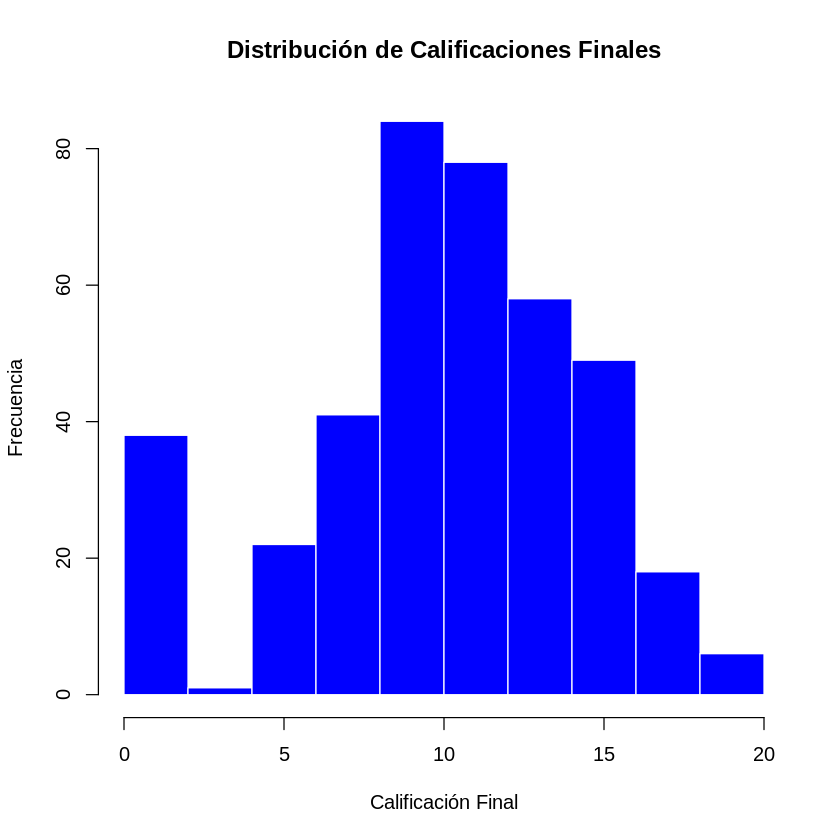

In [29]:
####           Obtención de estadisticos          ##

#realizamos histograma de todas las calificaciones de los estudiantes, para observar la distribucion de los datos

hist(datos_mat$G3,
     main = "Distribución de Calificaciones Finales Matemáticas",
     xlab = "Calificación Final",
     ylab = "Frecuencia",
     col = "blue",
     border = "white")

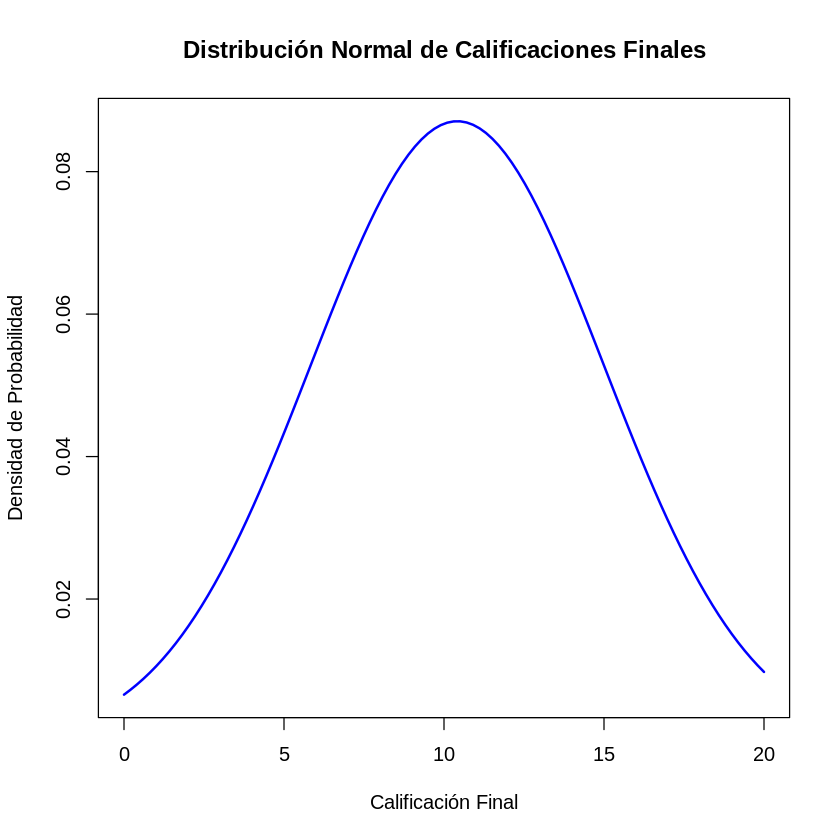

In [43]:
#### # Generar valores de una distribución normal usando la media y la desviación estándar observadas ####

x <- seq(0, 20, length.out = 100)
y <- dnorm(x, mean = media, sd = desviacion)

# Graficar la distribución normal
plot(x, y, type = "l", lwd = 2, col = "blue",
     main = "Distribución Normal de Calificaciones Finales",
     xlab = "Calificación Final", ylab = "Densidad de Probabilidad")

In [36]:
########                     ANOVA            ########################################################
# Se realiza el análisis de varianza (ANOVA)
# utilizando la función aov(), con la calificación final (G3) como variable dependiente y el
# género (sex) como variable independiente.

modelo_anova <- aov(G3 ~ sex, data = datos_mat)

# Se otienen los resultados de ANOVA mediante la función summary
summary(modelo_anova)

             Df Sum Sq Mean Sq F value Pr(>F)  
sex           1     89   88.51   4.252 0.0399 *
Residuals   393   8181   20.82                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [37]:
#### Prueba de Hipótesis ###

# Realizar la prueba t de student para comparar las calificaciones finales entre hombres y mujeres.

#Ho:
#Ha:

prueba_t <- t.test(G3 ~ sex, data = datos_mat)

# Mostrar los resultados de la prueba t
prueba_t


	Welch Two Sample t-test

data:  G3 by sex
t = -2.0651, df = 390.57, p-value = 0.03958
alternative hypothesis: true difference in means between group F and group M is not equal to 0
95 percent confidence interval:
 -1.85073226 -0.04545244
sample estimates:
mean in group F mean in group M 
       9.966346       10.914439 


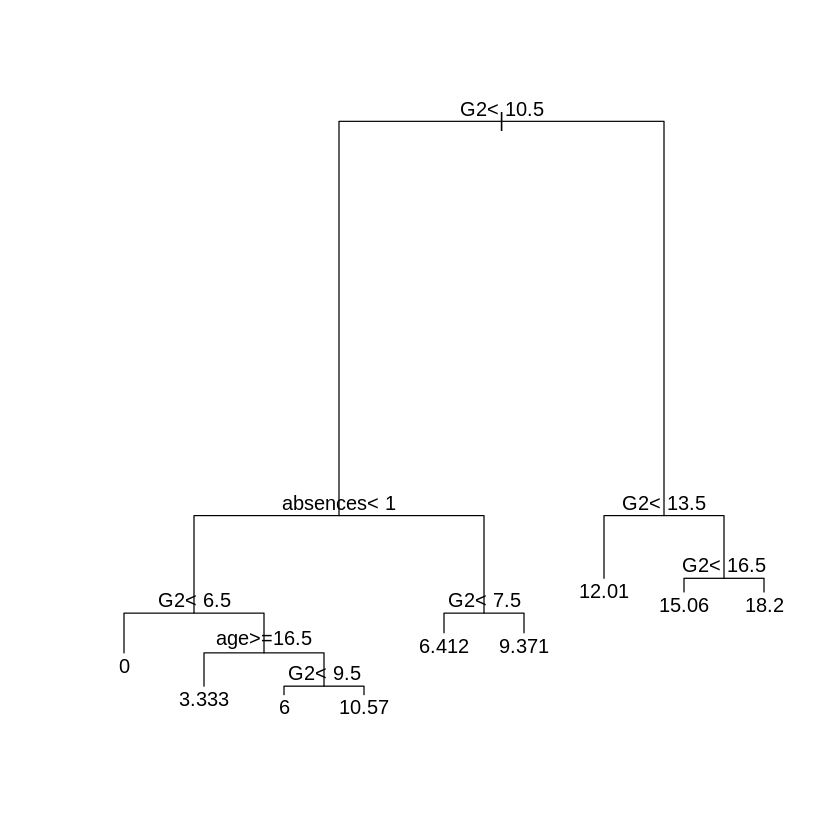

In [38]:
### Modelo de arbol de desición para tratar de predecir la calificacion final G3 en el conjunto de datos
### y en función de las otras variables disponibles en el conjunto de datos.

# Ajustar el árbol de decisión
arbol <- rpart(G3 ~ ., data = datos_mat)


# Visualizar el árbol de decisión
plot(arbol)
text(arbol)


In [41]:
# Predecir las calificaciones finales utilizando el árbol de decisión
predicciones <- predict(arbol, datos_mat)

# Convertir las predicciones a clases
predicciones_clases <- ifelse(predicciones <= 10, "Suspenso", "Aprobado")

# Crear la matriz de confusión
confusion_matrix <- table(datos_mat$G3, predicciones_clases)


# Mostrar la matriz de confusión
confusion_matrix


    predicciones_clases
     Aprobado Suspenso
  0         0       38
  4         0        1
  5         0        7
  6         0       15
  7         0        9
  8         0       32
  9         1       27
  10       13       43
  11       35       12
  12       30        1
  13       31        0
  14       27        0
  15       33        0
  16       16        0
  17        6        0
  18       12        0
  19        5        0
  20        1        0

In [42]:
# Calcular las métricas de evaluación del modelo
verdaderos_positivos <- sum(datos_mat$G3 > 10 & predicciones_clases == "Aprobado")
verdaderos_negativos <- sum(datos_mat$G3 <= 10 & predicciones_clases == "Suspenso")
falsos_positivos <- sum(datos_mat$G3 <= 10 & predicciones_clases == "Aprobado")
falsos_negativos <- sum(datos_mat$G3 > 10 & predicciones_clases == "Suspenso")

precision <- (verdaderos_positivos + verdaderos_negativos) / sum(confusion_matrix)
sensibilidad <- verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
especificidad <- verdaderos_negativos / (verdaderos_negativos + falsos_positivos)

# Imprimir las métricas de evaluación del modelo
cat("Precisión:", precision, "\n")
cat("Sensibilidad:", sensibilidad, "\n")
cat("Especificidad:", especificidad, "\n")

Precisión: 0.9316456 
Sensibilidad: 0.937799 
Especificidad: 0.9247312 
